In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
img0 = cv2.imread('../data/people.jpg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('../data/face.jpeg', cv2.IMREAD_GRAYSCALE)

In [3]:
detector = cv2.ORB_create(500)
_, fea0 = detector.detectAndCompute(img0, None)
_, fea1 = detector.detectAndCompute(img1, None)
descr_type = fea0.dtype

In [4]:
bow_trainer = cv2.BOWKMeansTrainer(50)
bow_trainer.add(np.float32(fea0))
bow_trainer.add(np.float32(fea1))
vocab = bow_trainer.cluster().astype(descr_type)

In [5]:
bow_descr = cv2.BOWImgDescriptorExtractor(detector, cv2.BFMatcher(cv2.NORM_HAMMING))
bow_descr.setVocabulary(vocab)

In [6]:
img = cv2.imread('../data/Lena.png', cv2.IMREAD_GRAYSCALE)
kps = detector.detect(img, None)
descr = bow_descr.compute(img, kps)

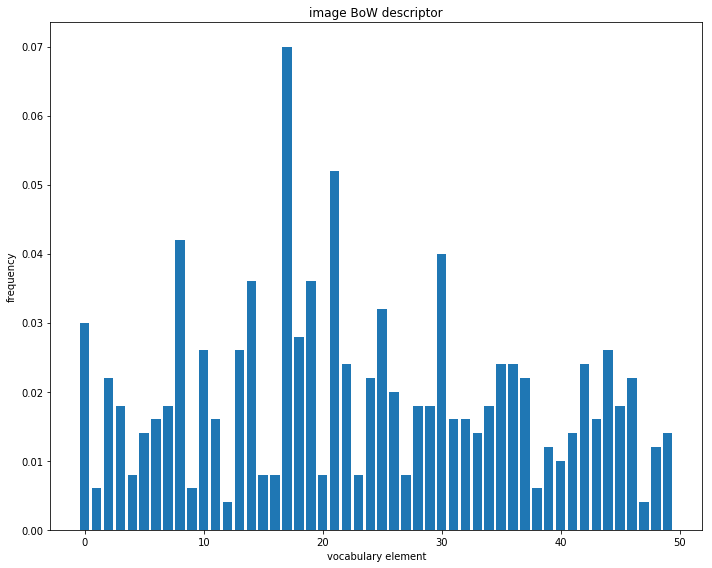

In [7]:
plt.figure(figsize=(10,8))
plt.title('image BoW descriptor')
plt.bar(np.arange(len(descr[0])), descr[0])
plt.xlabel('vocabulary element')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()